This script tries to develop Regression model for Coffee quality score. The used dataset is the one below:

https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi

A mean squared error of 5e-04 is reached using three layers Fully Connected Neural Network architecture

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import csv
from sklearn.utils import shuffle

In [13]:
#from row [20 to 28]
ds_features = []
total_points = []

with open('/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    columns = next(reader) #skip first line
    for row in reader:
        ds_features.append(row[20:29])
        total_points.append(row[31])

In [14]:
#make them float arrays
ds_features = np.array(ds_features).astype('float32')
total_points = np.array(total_points).astype('float32')

print(ds_features[:2])
print(total_points[:2])

[[ 8.58  8.5   8.42  8.58  8.25  8.42 10.   10.   10.  ]
 [ 8.5   8.5   7.92  8.    7.92  8.25 10.   10.   10.  ]]
[89.33 87.58]


In [15]:
#normalizing total point values
max_value = max(total_points)
total_points = total_points/max_value


print(max_value)

print(total_points[:2])

89.33
[1.         0.98040974]


In [16]:
#Shuffling and splitting the dataset
split_ratio = 0.8
threshold = int(split_ratio * total_points.shape[0])

In [17]:
X_train, Y_train = ds_features[:threshold], total_points[:threshold]
X_valid, Y_valid = ds_features[threshold:], total_points[threshold:]

In [38]:
#Now we have our dataset ready, let's build the network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal'),
])

In [39]:
model.compile(
    loss='mape',
    optimizer=tf.keras.optimizers.SGD(learning_rate=3e-5, momentum=0.9),
    metrics=['mse'])

In [40]:
class EarlyStop(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') is not None and logs.get('loss') < 0.70 and logs.get('val_loss')  < 0.70:                 
            print("\nReached wanted accuracy so cancelling training!")
            self.model.stop_training = True

In [41]:
es_callback = EarlyStop()

In [42]:
epochs = 4000
history = model.fit(
            X_train, Y_train,
            epochs=epochs,
            validation_data=(X_valid, Y_valid),
            verbose=1,
    callbacks=[es_callback])

Epoch 1/4000
6/6 [==============================] - 1s 39ms/step - loss: 1.0564 - mse: 1.5067e-04 - val_loss: 2.7248 - val_mse: 6.9641e-04
Epoch 2/4000
6/6 [==============================] - 0s 7ms/step - loss: 1.0252 - mse: 1.5503e-04 - val_loss: 2.4875 - val_mse: 5.9360e-04
Epoch 3/4000
6/6 [==============================] - 0s 7ms/step - loss: 1.0172 - mse: 1.5371e-04 - val_loss: 2.7158 - val_mse: 6.9178e-04
Epoch 4/4000
6/6 [==============================] - 0s 7ms/step - loss: 1.0200 - mse: 1.5090e-04 - val_loss: 2.7066 - val_mse: 6.8729e-04
Epoch 5/4000
6/6 [==============================] - 0s 7ms/step - loss: 1.0205 - mse: 1.4582e-04 - val_loss: 2.9868 - val_mse: 8.1916e-04
Epoch 6/4000
6/6 [==============================] - 0s 10ms/step - loss: 1.0379 - mse: 1.4613e-04 - val_loss: 2.9083 - val_mse: 7.8044e-04
Epoch 7/4000
6/6 [==============================] - 0s 7ms/step - loss: 1.0169 - mse: 1.4480e-04 - val_loss: 2.5193 - val_mse: 6.0497e-04
Epoch 8/4000
6/6 [==============

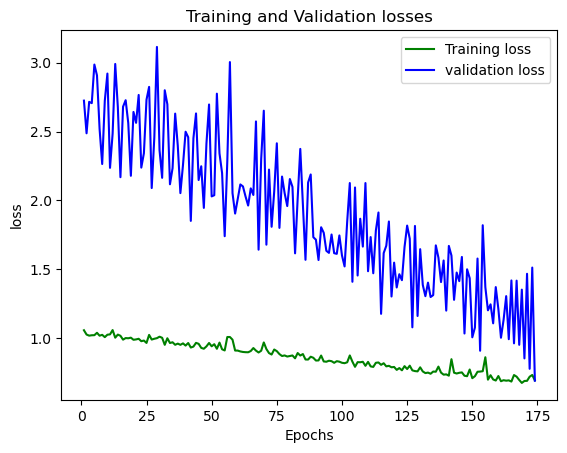

In [43]:
epoch_range = np.arange(1, history.epoch[-1]+2)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epoch_range, train_loss, 'g', label='Training loss')
plt.plot(epoch_range, val_loss, 'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

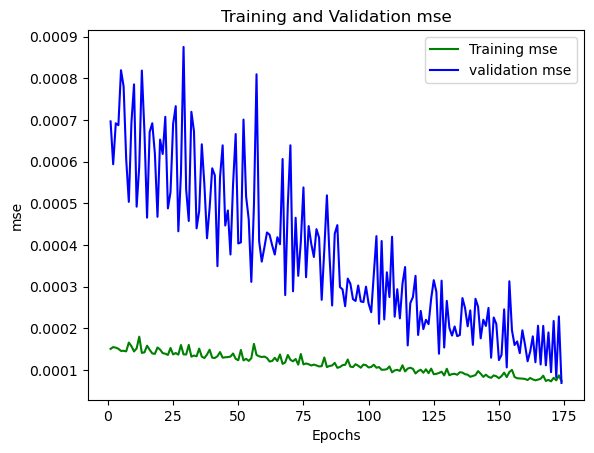

In [44]:
train_mse = history.history['mse']
val_mse = history.history['val_mse']

plt.plot(epoch_range, train_mse, 'g', label='Training mse')
plt.plot(epoch_range, val_mse, 'b', label='validation mse')
plt.title('Training and Validation mse')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model)